In [1]:
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Análisis de nulos
import missingno as msno

# Estadística
import scipy.stats as stats

# Configuración de warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('datos_residencia_hipotesis_1000.xlsx')

In [3]:
df.head()

,Paciente_ID,Fecha_ingreso,Fecha_salida,Edad,Sexo,Motivo_ingreso,%_Mejoría,Alta,Exitus
0,P0001,2024-03-03,2024-04-04,70,M,Fractura de cadera,95.6,Sí,No
1,P0002,2023-08-05,2023-08-16,91,M,Vacaciones para la familia,NaN,Sí,No
2,P0003,2024-11-06,NaN,67,F,Mayor dependencia,5.2,No,No
3,P0004,2024-08-10,2024-08-18,71,M,Vacaciones para la familia,NaN,Sí,No
4,P0005,2025-08-26,2025-09-06,85,M,Vacaciones para la familia,NaN,Sí,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Paciente_ID     1000 non-null   object 
 1   Fecha_ingreso   1000 non-null   object 
 2   Fecha_salida    706 non-null    object 
 3   Edad            1000 non-null   int64  
 4   Sexo            1000 non-null   object 
 5   Motivo_ingreso  1000 non-null   object 
 6   %_Mejoría       606 non-null    float64
 7   Alta            1000 non-null   object 
 8   Exitus          1000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [10]:
df['Fecha_ingreso']=pd.to_datetime(df['Fecha_ingreso'])
df['Fecha_salida']=pd.to_datetime(df['Fecha_salida'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Paciente_ID     1000 non-null   object        
 1   Fecha_ingreso   1000 non-null   datetime64[ns]
 2   Fecha_salida    706 non-null    datetime64[ns]
 3   Edad            1000 non-null   int64         
 4   Sexo            1000 non-null   object        
 5   Motivo_ingreso  1000 non-null   object        
 6   %_Mejoría       606 non-null    float64       
 7   Alta            1000 non-null   object        
 8   Exitus          1000 non-null   object        
 9   Mes             1000 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 78.3+ KB


In [14]:
df['Mes']= df['Fecha_ingreso'].dt.month_name(locale= 'es_ES')

In [15]:
df['Mes']

0           Marzo
1          Agosto
2       Noviembre
3          Agosto
4          Agosto
          ...    
995         Junio
996        Agosto
997    Septiembre
998     Diciembre
999       Octubre
Name: Mes, Length: 1000, dtype: object

In [16]:
df.head()

,Paciente_ID,Fecha_ingreso,Fecha_salida,Edad,Sexo,Motivo_ingreso,%_Mejoría,Alta,Exitus,Mes
0,P0001,2024-03-03,2024-04-04,70,M,Fractura de cadera,95.6,Sí,No,Marzo
1,P0002,2023-08-05,2023-08-16,91,M,Vacaciones para la familia,NaN,Sí,No,Agosto
2,P0003,2024-11-06,NaT,67,F,Mayor dependencia,5.2,No,No,Noviembre
3,P0004,2024-08-10,2024-08-18,71,M,Vacaciones para la familia,NaN,Sí,No,Agosto
4,P0005,2025-08-26,2025-09-06,85,M,Vacaciones para la familia,NaN,Sí,No,Agosto


In [28]:
meses_más_ingresos= df['Mes'].value_counts(ascending=False).head(3)

In [30]:
print('Los 3 meses con más ingresos son',meses_más_ingresos)

Los 3 meses con más ingresos son Mes
Agosto    272
Abril     134
Marzo     126
Name: count, dtype: int64


In [35]:
df['Motivo_ingreso'].value_counts()

Motivo_ingreso
Vacaciones para la familia    394
Demencia                      153
Mayor dependencia             141
Caída reciente                116
Prótesis de rodilla           101
Fractura de cadera             95
Name: count, dtype: int64

In [42]:
conteo=df.groupby(['Mes','Motivo_ingreso']).size().reset_index(name='Total')

In [43]:
conteo

,Mes,Motivo_ingreso,Total
0,Abril,Caída reciente,16
1,Abril,Demencia,29
2,Abril,Fractura de cadera,27
3,Abril,Mayor dependencia,17
4,Abril,Prótesis de rodilla,26
...,...,...,...
56,Septiembre,Demencia,3
57,Septiembre,Fractura de cadera,6
58,Septiembre,Mayor dependencia,12
59,Septiembre,Prótesis de rodilla,8


In [50]:
motivo_max_mes = conteo.sort_values('Total', ascending=False).drop_duplicates('Mes').reset_index(drop=True)

In [55]:
motivo_max_mes

,Mes,Motivo_ingreso,Total
0,Agosto,Vacaciones para la familia,272
1,Diciembre,Mayor dependencia,36
2,Marzo,Prótesis de rodilla,35
3,Abril,Demencia,29
4,Enero,Mayor dependencia,19
5,Junio,Caída reciente,13
6,Septiembre,Mayor dependencia,12
7,Octubre,Fractura de cadera,11
8,Febrero,Mayor dependencia,11
9,Noviembre,Demencia,9


In [ ]:
df.groupby(['Mes','Fecha_salida','Motivo_ingreso',]).size().reset_index(name='Total')

,Mes,Fecha_salida,Motivo_ingreso,Total
0,Abril,2022-04-29,Fractura de cadera,1
1,Abril,2022-05-01,Caída reciente,1
2,Abril,2022-05-02,Fractura de cadera,1
3,Abril,2022-05-02,Prótesis de rodilla,1
4,Abril,2022-05-05,Vacaciones para la familia,1
...,...,...,...,...
534,Septiembre,2025-10-09,Caída reciente,1
535,Septiembre,2025-10-19,Caída reciente,1
536,Septiembre,2025-10-19,Fractura de cadera,1
537,Septiembre,2025-10-22,Caída reciente,1


In [59]:
df[df['Motivo_ingreso']=='Vacaciones para la familia']

,Paciente_ID,Fecha_ingreso,Fecha_salida,Edad,Sexo,Motivo_ingreso,%_Mejoría,Alta,Exitus,Mes
1,P0002,2023-08-05,2023-08-16,91,M,Vacaciones para la familia,NaN,Sí,No,Agosto
3,P0004,2024-08-10,2024-08-18,71,M,Vacaciones para la familia,NaN,Sí,No,Agosto
4,P0005,2025-08-26,2025-09-06,85,M,Vacaciones para la familia,NaN,Sí,No,Agosto
7,P0008,2022-08-08,2022-08-15,66,M,Vacaciones para la familia,NaN,Sí,No,Agosto
9,P0010,2023-08-27,2023-09-03,67,M,Vacaciones para la familia,NaN,Sí,No,Agosto
...,...,...,...,...,...,...,...,...,...,...
987,P0988,2025-08-27,2025-09-14,74,F,Vacaciones para la familia,NaN,Sí,No,Agosto
991,P0992,2024-08-07,2024-08-20,83,F,Vacaciones para la familia,NaN,Sí,No,Agosto
992,P0993,2022-08-02,2022-08-16,68,F,Vacaciones para la familia,NaN,Sí,No,Agosto
996,P0997,2024-08-25,2024-09-07,83,M,Vacaciones para la familia,NaN,Sí,No,Agosto


In [81]:
df['Tiempo_ingreso']= (df['Fecha_salida']-df['Fecha_ingreso']).dt.days

In [82]:
df.head()

,Paciente_ID,Fecha_ingreso,Fecha_salida,Edad,Sexo,Motivo_ingreso,%_Mejoría,Alta,Exitus,Mes,Tiempo_ingreso
0,P0001,2024-03-03,2024-04-04,70,M,Fractura de cadera,95.6,Sí,No,Marzo,32.0
1,P0002,2023-08-05,2023-08-16,91,M,Vacaciones para la familia,NaN,Sí,No,Agosto,11.0
2,P0003,2024-11-06,NaT,67,F,Mayor dependencia,5.2,No,No,Noviembre,NaN
3,P0004,2024-08-10,2024-08-18,71,M,Vacaciones para la familia,NaN,Sí,No,Agosto,8.0
4,P0005,2025-08-26,2025-09-06,85,M,Vacaciones para la familia,NaN,Sí,No,Agosto,11.0


In [84]:
df[(df['Motivo_ingreso']=='Vacaciones para la familia')& (df['Tiempo_ingreso']>= 15)]

,Paciente_ID,Fecha_ingreso,Fecha_salida,Edad,Sexo,Motivo_ingreso,%_Mejoría,Alta,Exitus,Mes,Tiempo_ingreso
11,P0012,2022-04-20,2022-05-05,74,M,Vacaciones para la familia,NaN,Sí,No,Abril,15.0
12,P0013,2023-12-03,2023-12-22,77,M,Vacaciones para la familia,NaN,Sí,No,Diciembre,19.0
14,P0015,2024-08-28,2024-09-12,84,F,Vacaciones para la familia,NaN,Sí,No,Agosto,15.0
15,P0016,2022-08-12,2022-09-01,78,F,Vacaciones para la familia,NaN,Sí,No,Agosto,20.0
47,P0048,2022-08-01,2022-08-16,80,M,Vacaciones para la familia,NaN,Sí,No,Agosto,15.0
...,...,...,...,...,...,...,...,...,...,...,...
971,P0972,2025-01-05,2025-01-21,75,M,Vacaciones para la familia,NaN,Sí,No,Enero,16.0
973,P0974,2024-08-24,2024-09-08,90,F,Vacaciones para la familia,NaN,Sí,No,Agosto,15.0
979,P0980,2024-03-25,2024-04-13,81,M,Vacaciones para la familia,NaN,Sí,No,Marzo,19.0
986,P0987,2025-03-28,2025-04-12,83,F,Vacaciones para la familia,NaN,Sí,No,Marzo,15.0


In [87]:
df.groupby('Motivo_ingreso')['Tiempo_ingreso'].median().sort_values(ascending=False)

Motivo_ingreso
Caída reciente                38.0
Prótesis de rodilla           34.0
Fractura de cadera            33.0
Vacaciones para la familia    13.5
Demencia                       NaN
Mayor dependencia              NaN
Name: Tiempo_ingreso, dtype: float64

### Que podemos observar en la tabla anterior , que los pacientes que ingresan por demencia o por mayor dependencia el 100% de ellos se quedan ya de manera definitiva en la Residencia

### Por otro lado vemos que por vacaciones familiares, aunque sea el mayor número de ingresos pero son las estancias más cortas, por lo tanto en este caso deberiamos de plantear lo siguiente:
- Nuestro target deberia ser para pacientes con Demencia y mayor dependencia ya que son estancias sin fecha limite
- O nos centramos en pacientes de más corta duración como en agosto ya que el número es mayor
- Podriamos valorar que meses son los que normalmente ingresa más gente con protesis de rodilla y de esta manera lo que planteo es lo siguiente:
1. Campaña de marketing enfocada a las vacaciones familiares en agosto, corta estancia pero mayor volumen
2. Que meses son los que más operaciones de protesis hay y sacar campaña enfocada a ese target 
3. Nuestro mayor foco deberia ser gente muy mayor con demencia o mayor dependencia ya que son los que más tiempo van a estar

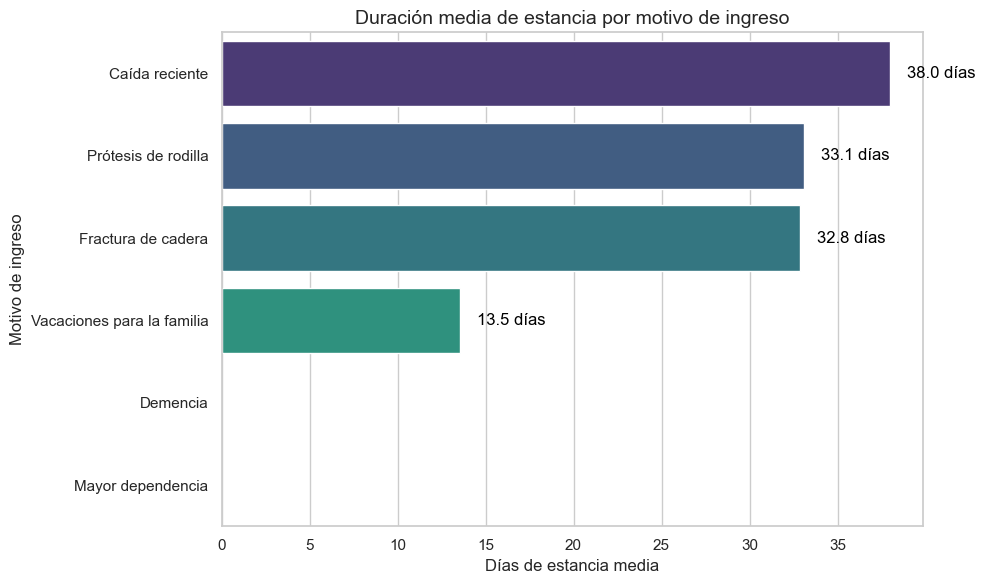

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Crear resumen de duración media por motivo
media_dias = df.groupby('Motivo_ingreso')['Tiempo_ingreso'].mean().sort_values(ascending=False)

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=media_dias.values, y=media_dias.index, palette="viridis")

# Etiquetas
for i, v in enumerate(media_dias.values):
    if not pd.isna(v):
        ax.text(v + 1, i, f"{v:.1f} días", color='black', va='center')

# Títulos
plt.title('Duración media de estancia por motivo de ingreso', fontsize=14)
plt.xlabel('Días de estancia media')
plt.ylabel('Motivo de ingreso')
plt.tight_layout()
plt.show()


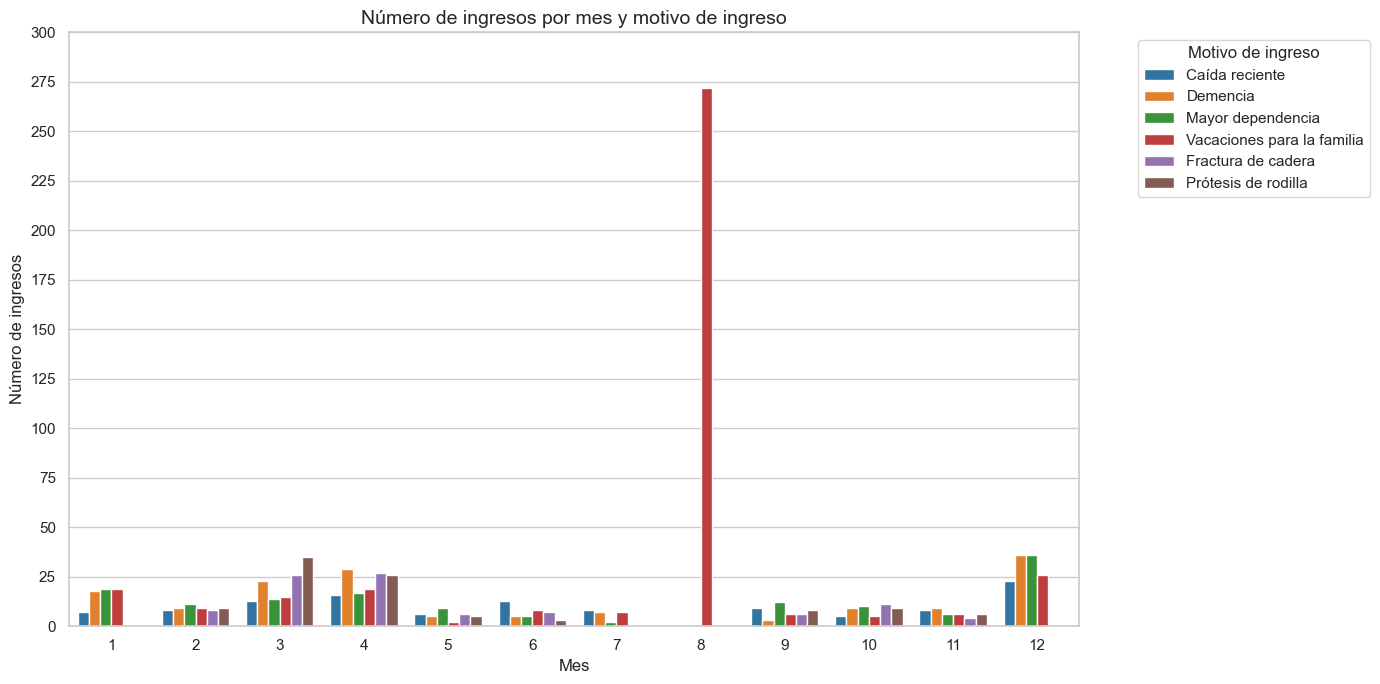

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar columna Mes
df['Mes'] = pd.to_datetime(df['Fecha_ingreso']).dt.month

# Crear tabla de conteo
conteo = df.groupby(['Mes', 'Motivo_ingreso']).size().reset_index(name='Total')

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(
    data=conteo,
    x='Mes',
    y='Total',
    hue='Motivo_ingreso',
    palette='tab10'
)

plt.title('Número de ingresos por mes y motivo de ingreso', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Número de ingresos')
plt.legend(title='Motivo de ingreso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0, 301, 25))  # aquí está el cambio
plt.tight_layout()
plt.show()

